# Navigation

---

In this notebook, we use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Start the environment

We begin by importing some necessary packages.  

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt

import rl_lib
from rl_lib.replay import ReplayBuffer
from rl_lib.agent import Agent, DQNExtensions
from rl_lib.training import dqn

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# get information about the environment
action_size = brain.vector_action_space_size

env_info = env.reset(train_mode=True)[brain_name]
state_size = len(env_info.vector_observations[0])

## 2. Train the agent

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to train the agent to navigate through the environment. The agent tries to collect many yellow bananas while avoiding blue bananas.

### 2.1 DQN algorithm

In the next cells, we train an agent using the standard DQN algorithm.

In [5]:
# set-up replay buffer
ReplayBufferInput = {
    "action_size": action_size,  # dimension of each action
    "buffer_size": int(1e5),  # replay buffer size
    "batch_size": 64,  # minibatch size
    "random_seed": 0,
    "alpha": 0.0,
    "beta": 0.0
}

replay_buffer = ReplayBuffer(**ReplayBufferInput)

In [6]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "seed": 0, # random seed
    "replay_buffer": replay_buffer, # replay buffer
    "gamma": 0.99, # discount factor
    "tau": 1e-3, # for soft update of target parameters
    "learning_rate": 5e-4, # learning rate
    "update_local_every": 2, # how often to update the local network
    "update_target_every": 4, # how often to update the target network
    "dqn_extensions": [] # if empty, the standard DQN algorithm is used for learning.
    
}

agent = Agent(**AgentInput)

In [7]:
Settings = {
    "n_episodes": 2000, # maximum number of training episodes
    "max_t": 1000, # maximum number of timesteps per episode
    "min_avg_score": 13., # minimum average score over 100 episodes that the agent must achieve to consider the task fulfilled
    "eps_start": 1.0, # starting value of epsilon, for epsilon-greedy action selection
    "eps_end": 0.01, # minimum value of epsilon
    "eps_decay": 0.95, # multiplicative factor (per episode) for decreasing epsilon
    "continue_learning": True, # if true, the agent continues to learn after reaching min_avg_score until reaching n_episodes
    "filename": "DQN" #  name for the file that contains the trained network parameters
}

# start training
scores_dqn = dqn(env, brain_name, agent, **Settings)

Episode 100	Average Score: 4.57
Episode 200	Average Score: 9.41
Episode 300	Average Score: 11.22
Episode 369	Average Score: 13.00
Environment solved in 269 episodes!	Average Score: 13.00
Episode 400	Average Score: 13.46
Episode 500	Average Score: 15.22
Episode 600	Average Score: 15.29
Episode 700	Average Score: 15.45
Episode 800	Average Score: 14.48
Episode 900	Average Score: 15.55
Episode 1000	Average Score: 14.91
Episode 1100	Average Score: 15.52
Episode 1200	Average Score: 15.42
Episode 1300	Average Score: 15.38
Episode 1400	Average Score: 15.11
Episode 1500	Average Score: 14.77
Episode 1600	Average Score: 15.16
Episode 1700	Average Score: 15.73
Episode 1800	Average Score: 14.71
Episode 1900	Average Score: 14.86
Episode 2000	Average Score: 14.44


### 2.2 Double DQN with Prioritized Experience Replay 

In [8]:
# set-up replay buffer
ReplayBufferInput = {
    "action_size": action_size,  # dimension of each action
    "buffer_size": int(1e5),  # replay buffer size
    "batch_size": 64,  # minibatch size
    "random_seed": 0,
    "alpha": 0.7,
    "beta": 0.5
}

replay_buffer_prioritized_sampling = ReplayBuffer(**ReplayBufferInput)

In [9]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "seed": 0, # random seed
    "replay_buffer": replay_buffer_prioritized_sampling, # replay buffer
    "gamma": 0.99, # discount factor
    "tau": 1e-3, # for soft update of target parameters
    "learning_rate": 5e-4, # learning rate
    "update_local_every": 2, # how often to update the local network
    "update_target_every": 4, # how often to update the target network
    "dqn_extensions": [DQNExtensions.DoubleDQN] # if empty, the standard DQN algorithm is used for learning.
    
}

agent_double_dqn_prioritized_experience_sampling = Agent(**AgentInput)

In [10]:
Settings = {
    "n_episodes": 2000, # maximum number of training episodes
    "max_t": 1000, # maximum number of timesteps per episode
    "min_avg_score": 13., # minimum average score over 100 episodes that the agent must achieve to consider the task fulfilled
    "eps_start": 1.0, # starting value of epsilon, for epsilon-greedy action selection
    "eps_end": 0.01, # minimum value of epsilon
    "eps_decay": 0.95, # multiplicative factor (per episode) for decreasing epsilon
    "continue_learning": True, # if true, the agent continues to learn after reaching min_avg_score until reaching n_episodes
    "filename": "DoubleDQN_PrioritizedExperienceSampling" #  name for the file that contains the trained network parameters
}

# start training
scores_double_dqn_prioritized_experience_sampling = dqn(env, brain_name, agent, **Settings)

Episode 100	Average Score: 11.06
Episode 115	Average Score: 13.01
Environment solved in 15 episodes!	Average Score: 13.01
Episode 200	Average Score: 14.25
Episode 300	Average Score: 14.29
Episode 400	Average Score: 14.18
Episode 500	Average Score: 15.89
Episode 600	Average Score: 15.81
Episode 700	Average Score: 15.29
Episode 800	Average Score: 15.35
Episode 900	Average Score: 15.60
Episode 1000	Average Score: 15.72
Episode 1100	Average Score: 16.00
Episode 1200	Average Score: 13.96
Episode 1300	Average Score: 13.91
Episode 1400	Average Score: 14.74
Episode 1500	Average Score: 15.64
Episode 1600	Average Score: 15.26
Episode 1700	Average Score: 15.83
Episode 1800	Average Score: 14.52
Episode 1900	Average Score: 14.88
Episode 2000	Average Score: 15.06


## 3. Visualize and compare the results

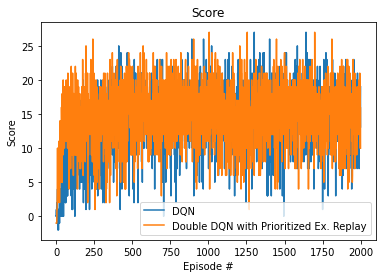

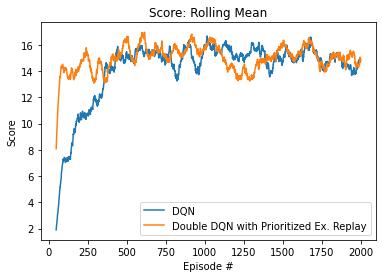

In [32]:
import pandas as pd

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
dqn_plot, = ax.plot(np.arange(len(scores_dqn)), scores_dqn)
dqn_plot.set_label('DQN')
double_dqn, = ax.plot(np.arange(len(scores_double_dqn_prioritized_experience_sampling)), 
                     scores_double_dqn_prioritized_experience_sampling)
double_dqn.set_label("Double DQN with Prioritized Ex. Replay")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score')
ax.legend()


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
dqn_plot, = ax.plot(pd.DataFrame(scores_dqn).rolling(50).mean())
dqn_plot.set_label('DQN')
double_dqn, = ax.plot(pd.DataFrame(scores_double_dqn_prioritized_experience_sampling).rolling(50).mean())
double_dqn.set_label("Double DQN with Prioritized Ex. Replay")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score: Rolling Mean')
ax.legend()


In [12]:
def visualize_agent(agent, env, env_info):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state)                      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

In [13]:
# see the agent acting in the environment

agent_double_dqn_prioritized_experience_sampling.qnetwork_local.load_state_dict(
    torch.load('DoubleDQN_PrioritizedExperienceSampling.pth'))

visualize_agent(agent_double_dqn_prioritized_experience_sampling, env, env_info)

Score: 14.0


When finished, you can close the environment.

In [14]:
env.close()